In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from google.colab import files
from keras_preprocessing import image
from shutil import copyfile
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [ ]:
# print("Farrel")
# farrel_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/1-farrel/traditional/'
# farrel_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/1-farrel/modern/'
# print('Traditional Batik:', len(os.listdir(farrel_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(farrel_modern_source_dir)))

# print("\nDosen")
# dosen_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/2-dosen/traditional/'
# dosen_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/2-dosen/modern/'
# print('Traditional Batik:', len(os.listdir(dosen_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(dosen_modern_source_dir)))

# print("\nAnggun")
# anggun_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/3-anggun/traditional/'
# anggun_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/3-anggun/modern/'
# print('Traditional Batik:', len(os.listdir(anggun_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(anggun_modern_source_dir)))

# print("\nRiqqah")
# riqqah_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/4-riqqah/traditional/'
# riqqah_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/4-riqqah/modern/'
# print('Traditional Batik:', len(os.listdir(riqqah_traditional_source_dir)))
# print('Modern Batik:', len(os.listdir(riqqah_modern_source_dir)))

print("\nAll")
all_traditional_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all/traditional/'
all_modern_source_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all/modern/'
print('Traditional Batik:', len(os.listdir(all_traditional_source_dir)))
print('Modern Batik:', len(os.listdir(all_modern_source_dir)))
# print(os.listdir(all_modern_source_dir))



All
Traditional Batik: 392
Modern Batik: 130


In [ ]:
training_dir = '/tmp/batik-technique/training/'
training_traditional_dir = '/tmp/batik-technique/training/traditional/'
training_modern_dir = '/tmp/batik-technique/training/modern/'

validation_dir = '/tmp/batik-technique/validation/'
validation_traditional_dir = '/tmp/batik-technique/validation/traditional/'
validation_modern_dir = '/tmp/batik-technique/validation/modern/'

testing_dir = '/tmp/batik-technique/testing/'
testing_traditional_dir = '/tmp/batik-technique/testing/traditional/'
testing_modern_dir = '/tmp/batik-technique/testing/modern/'

In [ ]:
# def split_data(SOURCE, DESTINATION):
#   file_names = os.listdir(SOURCE)

#   for index, file in enumerate(file_names):
#     copyfile(os.path.join(SOURCE, file), os.path.join(DESTINATION, file))

# gdrive_traditional_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all/traditional/'
# gdrive_modern_dir = '/content/gdrive/Shared drives/Capstone Project/Dataset/technique-based dataset/all/modern/'

# split_data(training_traditional_dir, gdrive_traditional_dir)
# split_data(training_modern_dir, gdrive_modern_dir)

In [ ]:
try:
    os.mkdir('/tmp/batik-technique')
    os.mkdir(os.path.join('/tmp/batik-technique/', 'training'))
    os.mkdir(os.path.join('/tmp/batik-technique/', 'validation'))
    os.mkdir(os.path.join('/tmp/batik-technique/', 'testing'))
    os.mkdir(os.path.join('/tmp/batik-technique/training/', 'traditional'))
    os.mkdir(os.path.join('/tmp/batik-technique/training/', 'modern'))
    os.mkdir(os.path.join('/tmp/batik-technique/validation/', 'traditional'))
    os.mkdir(os.path.join('/tmp/batik-technique/validation/', 'modern'))
    os.mkdir(os.path.join('/tmp/batik-technique/testing/', 'traditional'))
    os.mkdir(os.path.join('/tmp/batik-technique/testing/', 'modern'))
except OSError:
    pass

In [ ]:
# def split_data(SOURCE, TRAINING):
#   if not os.path.exists(TRAINING): 
#     os.makedirs(TRAINING)

#   file_names = os.listdir(SOURCE)

#   for index, file in enumerate(file_names):
#     copyfile(os.path.join(SOURCE, file), os.path.join(TRAINING, file))


# split_data(farrel_traditional_source_dir, training_traditional_dir)
# split_data(farrel_modern_source_dir, training_modern_dir)
# print(len(os.listdir(training_traditional_dir)))
# print(len(os.listdir(training_modern_dir)))

# split_data(dosen_traditional_source_dir, training_traditional_dir)
# split_data(dosen_modern_source_dir, training_modern_dir)
# print(len(os.listdir(training_traditional_dir)))
# print(len(os.listdir(training_modern_dir)))

# split_data(riqqah_traditional_source_dir, training_traditional_dir)
# split_data(riqqah_modern_source_dir, training_modern_dir)
# print(len(os.listdir(training_traditional_dir)))
# print(len(os.listdir(training_modern_dir)))

# split_data(anggun_traditional_source_dir, training_traditional_dir)
# split_data(anggun_modern_source_dir, training_modern_dir)
# print(len(os.listdir(training_traditional_dir)))
# print(len(os.listdir(training_modern_dir)))

In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, TESTING, SPLIT_SIZE):
  if not os.path.exists(TRAINING): 
    os.makedirs(TRAINING) 

  if not os.path.exists(VALIDATION): 
    os.makedirs(VALIDATION)

  if not os.path.exists(TESTING): 
    os.makedirs(TESTING) 

  file_names = os.listdir(SOURCE)

  random_set = random.sample(file_names, len(file_names))
  random_set_length = len(random_set)

  for index, data in enumerate(random_set):
    if index < SPLIT_SIZE * random_set_length:
      if index < 0.8 * random_set_length:
        copyfile(os.path.join(SOURCE, data), os.path.join(TRAINING, data))
      else:
        copyfile(os.path.join(SOURCE, data), os.path.join(VALIDATION, data))
    else: 
      copyfile(os.path.join(SOURCE, data), os.path.join(TESTING, data))

In [ ]:
split_size = .9
split_data(all_traditional_source_dir, training_traditional_dir, validation_traditional_dir, testing_traditional_dir, split_size)
split_data(all_modern_source_dir, training_modern_dir, validation_modern_dir, testing_modern_dir, split_size)

In [ ]:
print("Training Data")
print("traditional :", len(os.listdir(training_traditional_dir)))
print("modern :", len(os.listdir(training_modern_dir)))

print("\nValidation Data")
print("traditional :", len(os.listdir(validation_traditional_dir)))
print("modern :", len(os.listdir(validation_modern_dir)))

print("\nTesting Data")
print("traditional :", len(os.listdir(testing_traditional_dir)))
print("modern :", len(os.listdir(testing_modern_dir)))

Training Data
traditional : 314
modern : 104

Validation Data
traditional : 39
modern : 13

Testing Data
traditional : 39
modern : 13


In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    batch_size=11,
    class_mode = 'binary',
    target_size = (300, 300),
    shuffle=True
)



validation_datagen = ImageDataGenerator(
    rescale = 1/255
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=4,
    class_mode = 'binary',
    target_size = (300, 300),
    shuffle=True
)

Found 418 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       7

In [ ]:
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator,
                    verbose = 1)

Epoch 1/20
38/38 [==============================] - 116s 3s/step - loss: 0.6033 - acc: 0.7560 - val_loss: 0.5840 - val_acc: 0.7500
Epoch 2/20
38/38 [==============================] - 113s 3s/step - loss: 0.5792 - acc: 0.7512 - val_loss: 0.6310 - val_acc: 0.7500
Epoch 3/20
38/38 [==============================] - 113s 3s/step - loss: 0.5679 - acc: 0.7512 - val_loss: 0.5882 - val_acc: 0.7500
Epoch 4/20
38/38 [==============================] - 112s 3s/step - loss: 0.5626 - acc: 0.7464 - val_loss: 0.6000 - val_acc: 0.7500
Epoch 5/20
38/38 [==============================] - 113s 3s/step - loss: 0.5507 - acc: 0.7560 - val_loss: 0.5803 - val_acc: 0.7500
Epoch 6/20
38/38 [==============================] - 113s 3s/step - loss: 0.5507 - acc: 0.7512 - val_loss: 0.5908 - val_acc: 0.7500
Epoch 7/20
38/38 [==============================] - 112s 3s/step - loss: 0.5364 - acc: 0.7464 - val_loss: 0.5918 - val_acc: 0.7500
Epoch 8/20
38/38 [==============================] - 115s 3s/step - loss: 0.5361 - a

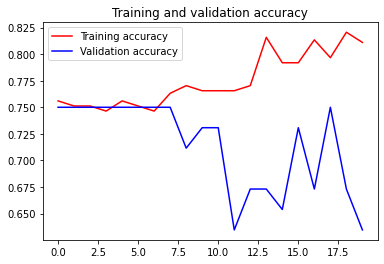

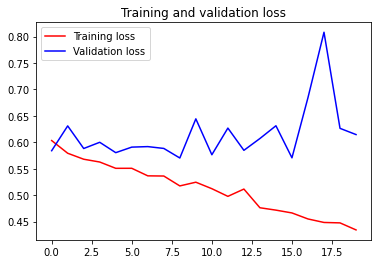

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot  ( epochs, val_acc, 'b', label='Validation accuracy')
plt.title ('Training and validation accuracy')
# plt.title('Training accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot  ( epochs, val_loss, 'b', label='Validation loss')
plt.title ('Training and validation loss')
# plt.title('Training loss')
plt.legend()

plt.show()

Saving megamendung-11.jpg to megamendung-11.jpg
Saving megamendung-7.jpg to megamendung-7.jpg


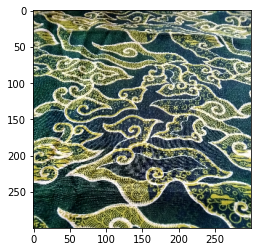

modern: 100.00%


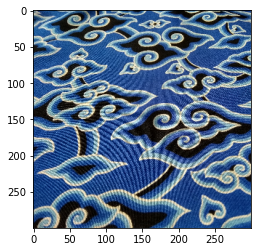

modern: 100.00%


In [ ]:
labels = train_generator.class_indices.keys()

uploaded = files.upload()

for file_name in uploaded.keys():
 
  # predicting images
  path = file_name
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))